In [1]:
#Import modulos / bibliotecas de funcion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
rutaArchivo = './Mall_Customers-2.csv'
data=pd.read_csv(rutaArchivo, index_col=0)

In [4]:
data.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
data.rename({'Gender':'Genero','Age':'Edad','Annual Income (k$)':'Ingreso','Spending Score (1-100)':'Ponderacion'}, axis = 1, inplace = True)

In [6]:
data.head(5)

,Genero,Edad,Ingreso,Ponderacion
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [7]:
data.groupby('Genero').size()

Genero
Female    112
Male       88
dtype: int64

In [8]:
data['Segmento'] = np.where(data.Ingreso >= 90 , 'Ingreso alto', np.where(data.Ingreso < 50, 'Ingreso bajo', 'Ingreso moderado'))

In [9]:
data

,Genero,Edad,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,19,15,39,Ingreso bajo
2,Male,21,15,81,Ingreso bajo
3,Female,20,16,6,Ingreso bajo
4,Female,23,16,77,Ingreso bajo
5,Female,31,17,40,Ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,Ingreso alto
197,Female,45,126,28,Ingreso alto
198,Male,32,126,74,Ingreso alto


In [10]:
data.groupby('Segmento')['Ingreso'].size()

Segmento
Ingreso alto         22
Ingreso bajo         72
Ingreso moderado    106
Name: Ingreso, dtype: int64

# separacion de los datos


In [11]:
train , test = train_test_split(data,test_size=0.4, stratify=data['Segmento'],random_state=42)
train.head(5)

,Genero,Edad,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
30,Female,23,29,87,Ingreso bajo
43,Male,48,39,36,Ingreso bajo
147,Male,48,77,36,Ingreso moderado
130,Male,38,71,75,Ingreso moderado
67,Female,43,48,50,Ingreso bajo


# Diagrama de dispercion de los atributos emparejados

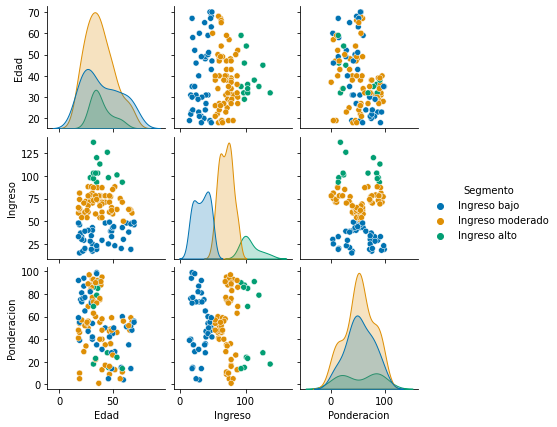

In [12]:
sns.pairplot(train, hue='Segmento', height =2 , palette='colorblind');

# Separacion objetivo - explicativas de cada grupo

In [13]:
#grupo entrenamiento
x_train = train[['Ingreso','Ponderacion']] #train[['Genero','Edad','Ingreso','Ponderacion']]
y_train = train['Segmento']
#grupo prueba
x_test = train[['Ingreso','Ponderacion']] #train[['Genero','Edad','Ingreso','Ponderacion']]
y_test = train['Segmento']
#Mostrar los primeros valores
print(x_train.head(5))
print(y_train.head(5))

            Ingreso  Ponderacion
CustomerID                      
30               29           87
43               39           36
147              77           36
130              71           75
67               48           50
CustomerID
30         Ingreso bajo
43         Ingreso bajo
147    Ingreso moderado
130    Ingreso moderado
67         Ingreso bajo
Name: Segmento, dtype: object


# Creacion del modelo del arbol de decision

In [14]:
mod_dt = DecisionTreeClassifier(max_depth=3,random_state=1)
mod_dt.fit(x_train,y_train)
prediccion = mod_dt.predict(x_test)#Creacion del modelo del arbol de decision
mod_dt = DecisionTreeClassifier(max_depth=3,random_state=1)
mod_dt.fit(x_train,y_train)
prediccion = mod_dt.predict(x_test)

In [15]:
#Modulos para metricas de eficiencia del modelo
from sklearn import metrics

In [16]:
#Verificacion de la precision del arbol
print('La precision del arbol de decision es: {:.3f}'.format(metrics.accuracy_score(prediccion,y_test)))

La precision del arbol de decision es: 1.000


In [17]:
mod_dt.feature_names_in_

array(['Ingreso', 'Ponderacion'], dtype=object)

# Visualizacion del arbol de decision

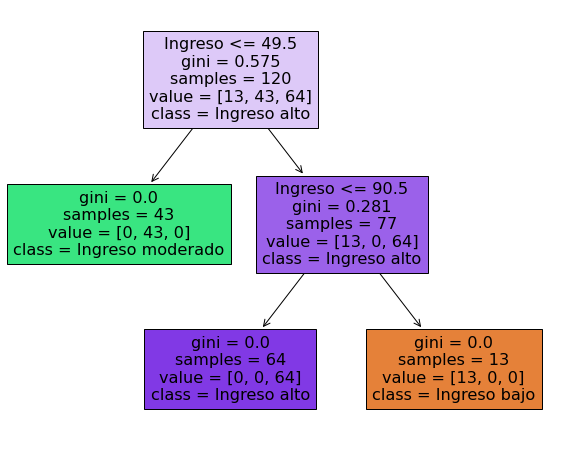

In [18]:
plt.figure(figsize=(10,8))
plot_tree(mod_dt,feature_names=mod_dt.feature_names_in_,
          class_names=['Ingreso bajo','Ingreso moderado','Ingreso alto'],filled=True);